<div align='left' style="width:400px;height:120px;overflow:hidden;">
<a href='http://www.uff.br'>
<img align='left' style='display: block;height: 92%' src='imgs/UFF.png' alt='UFF logo' title='UFF logo'/>
</a>
<a href='http://www.ic.uff.br'>
<img align='left' style='display: block;height: 100%' src='imgs/logo-ic.png' alt='IC logo' title='IC logo'/>
</a>
</div>

### Machine Learning
# Practical Work 2: Reforcement Learning

#### Alunos:
### [Ícaro Goulart Faria Motta França](http://icaromotta.com)
### [Sidney Araujo Melo]()
#### [Instituto de Computação](http://www.ic.uff)
#### [Universidade Federal Fluminense](http://www.uff.br)
$\renewcommand{\vec}[1]{\boldsymbol{#1}}$

In [1]:
#: imports
import random
from collections import defaultdict, namedtuple
from itertools import product, starmap

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import Image, YouTubeVideo
from scipy import stats
%matplotlib inline
sns.set()
states_colors = matplotlib.colors.ListedColormap(
    ['#9A9A9A', '#D886BA', '#4D314A', '#6E9183'])
cmap_default = 'Blues'
cpal_default = sns.color_palette(("Blues_d"))

sns.set_style("white")
sns.set_context("poster")
random.seed(1)

# Aprendizagem por Reforço (RL)

## Conceito
Aprendizado por reforço (Reinforcement Learning) é um ramo estudado em estatística, psicologia, neurociência e ciência da computação. Atraiu o interesse de pesquisadores ligados a aprendizado de máquina e inteligência artificial, e é um método de programação de agentes através do oferecimento de recompensas e punições, sem a necessidade de especificar como uma tarefa deve ser realizada.

É entendido como o problema encontrado por um agente que deve aprender como se comportar em um ambiente dinâmico através de interações do tipo “tentativa e erro”.

Em um ambiente de Aprendizagem por Reforço, um agente está inserido no ambiente e interage com ele através de percepções e ações. A cada passo, o agente percebe o estado atual do ambiente e escolhe, então, uma ação.

<img align="center" style='display: block;width: 75%; padding: 20px' src="imgs\DiagramaAR.PNG">

A ação altera o estado do ambiente, e uma medida dessa mudança de estado é informada ao agente através de um valor de sinal de reforço, que pode ser uma recompensa ou uma punição. O objetivo da Aprendizagem por Reforço é determinar a sequência de ações que maximiza as recompensas recebidas.

## RL não é: 

* **Aprendizado supervisionado**
    * Não se trata de aprender através de exemplos rotulados. Há situações que é impraticável o uso de aprendizagem supervisionada. Por exemplo, como podemos obter amostras do comportamento correto e representativo para qualquer situação? E se o agente for atuar em um ambiente desconhecido? 
    
    
* **Aprendizado não-supervisionado**
    * Não se trata de aprender similaridades, relações ou correlações entre dados.
    
Poderíamos pensar que todos os algoritmos de Aprendizado de Máquina são ou supervisionados ou não-supervisionados. Porém, há outras classificações. Uma dessas excessões é o Aprendizado por Reforço.
    


## Markov Decision Process

Markov Decision Process (MDP), e em português Processo de Decisão de Markov, é uma forma de modelar problemas de decisões sequenciais em ambientes completamente observáveis, porém estocásticos. MDPs representam o modelo do mundo através de **estados, ações, transições e recompensas**. São chamados "de Markov" porque os processos modelados obedecem a propriedade de Markov: **o efeito de uma ação em um estado, depende apenas da ação e do estado atual do sistema (e não de como o processo chegou a tal estado) **; e são chamados de "processos de decisão" **porque modelam a possibilidade de um agente interferir periodicamente no sistema executando ações**, diferentemente de Cadeias de Markov, onde não se trata de como interferir no processo.

### Exemplo: mundo 4 x 3
Nesse mundo, o agente precisa encontrar a saída. 
* Os estados terminais são [+1, -1]. 
* Cada outro estado tem uma recompensa de -0.04. 
* Utilidade total é a soma das recompensas. 
* O agente executa a ação desejada com prob. 0.8, mas com prob. 0.1 pode fazer um movimento lateral. 

<img align="center" style='display: block;width: 75%; padding: 20px' src="imgs\mdp_1.png">

####  S: conjunto de estados
* S = {(1, 1), (1, 2), ..., (3, 3), (3, 4)}

####  A: ações
* A = { ↑, ↓, ←, → }

Observação: A ação de ir em direção à parede deixa o agente no mesmo lugar.

####  T: transições
* T: S x A x S → [0, 1] = one-step transition model 
* T(s, a, s'): probabilidade de alcançar s' realizando a em s 
* T(s, a, ·): distribuição de probabilidades sobre S 


####  R: recompensas
* R: S x A → R = recompensa esperada 
* R(s, a): recompensa esperada por fazer a em s 
* Não confundir com a recompensa imediata $r_{t}$

** T e R especificam a dinâmica do ambiente **

### Possível Solução
A sequência ** U,U,R,R,R ** leva ao estado +1 com probabilidade:
* $0.8^{5} = 0.32768 $ 
* mas também pode fazer outro caminho com probabilidade de $0.1^{4} * 0.8 = 0.00008$ 

### Políticas
* Uma sequência de ações fixa, nem sempre leva a solução. 
* É necessário especificar o que o agente deve fazer para cada estado que ele pode alcançar.
* Essa solução é chamada de uma política: $\pi$
    * $\pi(s)$ é a ação recomendada pela política $\pi$ para o estado s. 
    * A qualidade de uma política é medida pela utilidade esperada da sequência de ações geradas.
    * Uma política ótima é representada por $\pi^{*}$
    
#### Política conservadora
* Como o custo do passo é baixo, comparado a penalidade de terminar no estado (4,2), o agente prefere dar a volta.
* Política ótima para o exemplo:
<img align="center" style='display: block;width: 45%; padding: 20px' src="imgs\mdp_politica_conservadora.png">

#### Risco x Recompensa
* O balanço entre risco e recompensa depende do valor de R(s) para os estados. Pode ocorrer situações onde a política informa que é melhor pular no buraco (ir em em direção a -1) do que ficar parado.
<img align="center" style='display: block;width: 45%; padding: 20px' src="imgs\mdp_politica_risco_e_recompensa.png">

#### Características
* **Horizontes finitos x infinitos x indefinido**
    * **finitos:** quando há um número fixo de decisões a tomar.
    * **infinitos:** quando a tomada de decisão é feita repetidamente, sem a possibilidade de parada.
    * **indefinido:** semelhante ao horizonte infinito, mas com a possibilidade do processo parar se chegar a algum estado que tenha sido marcado como final.
    

* **Políticas estacionárias x não estacionárias **
    * **estacionária:** se a ação recomendada independe da época de decisão (ou seja, $d_{k} = d_{j}$ para todo k e j).
    * **não estacionária:** se a ação tomada depende da época de decisão
    
    
* **Total x Parcial**
    * total: se cada uma de suas regras de decisão é definida para todos os estados do MDP.
    * parcial: se alguma de suas regras de decisão é definida para apenas alguns estados do MDP.
    
    
* **Determinística x Não-determinística**
    * **determinística:** quando cada estado é sempre mapeado em uma única ação.
    * **não-determinística (estocástica ou randomizada):** quando um estado é mapeado em um conjunto de ações, sendo que cada ação tem uma probabilidade de ser escolhida. Neste caso, cada regra de decisão é uma função $d_{k} : S x A → [0, 1]$.
    
    
* **Markoviana x Não-Markoviana**
    * **Markoviana (ou sem memória):** quando a escolha da ação depende apenas do estado corrente
    * **Não-Markoviana:** quando a escolha da ação depende de todo o histórico de ações e estados do sistema até o momento. As regras de decisão são definidas então como funções $d_{k} : H_{k} → A$, onde $H_{k}$ é o histórico de ações e estados até a época de decisão k.
    

#### Utilidade
* ** Recompensas aditivas **
    $$U_{h}([s_{0},s_{1},s_{2},...]) = R(s_{0}) + R(s_{1}) + R(s_{2}) + ...$$
    
    
* ** Recompensas com desconto **
    * Fator de desconto $\gamma[0..1]$
    $$U_{h}([s_{0},s_{1},s_{2},...]) = R(s_{0}) + \gamma R(s_{1}) + \gamma^{2} R(s_{2})  + ...$$
    
    
* **Portanto**, de forma geral, uma política ótima deve satisfazer:
    $$U^{\pi}(s) = E[\sum_{t=0}^{\infty}\gamma^{t}R(s_{t})]$$
    $$ \operatorname*{arg\,max}_\pi U^{\pi}(s) \rightarrow \pi^{*}(s) = \operatorname*{arg\,max}_{a \in A(s)} \sum_{s^{´}} P(s^{´}|s,a) U(s^{´}) $$
    
    
#### Algoritmos
Os principais algoritmos para encontrar políticas ótimas são:
* Value Iteration
* Policy Iteration

#### Value Iteration
* A ideia básica é computar a utilidade de cada estado e usá-la para selecionar a melhor ação.

* A utilidade de um estado é a utilidade esperada das sequências de estados subsequentes, que por sua vez é função de $\pi$.
$$U^{\pi}(s) = E[\sum_{t=0}^{\infty}\gamma^{t}R(s_{t})]$$ 
<img align="center" style='display: block;width: 45%; padding: 5px' src="imgs\mdp_value_iteration.png">

* O cálculo de U(s) permite selecionar ações utilizando o princípio da Utilidade Máxima Esperada. Basta escolher a ação que maximiza a utilidade do próximo estado:
$$\pi^{*} = \operatorname*{arg\,max}_{a} \sum_{s^{´}} T(s,a,s^{´}) U(s^{´})$$

* Isso pode ser feito analisando os vizinhos. A utilidade de um estado é a recompensa imediata mais a utilidade (com desconto) esperada daquele estado.
    * Equação de Bellman: $U(s) = R(s) + \gamma \operatorname*{max}_{a} \sum_{s^{´}} T(s,a,s^{´}) U(s^{´})$
    * Exemplo:  
    <table>
        <tr>
            <td>U(1,1) = -0.04 + $\pi$ max {</td>
            <td>0.8U(1,2)+0.1U(2,1)+0.1U(1,1),</td>
            <td>(U)</td>
        </tr>
        <tr>
            <td></td>
            <td>0.9U(1,1)+0.1U(1,2),</td>
            <td>(L) </td>
        </tr>
        <tr>
            <td></td>
            <td>0.9U(1,1)+0.1U(2,1),</td>
            <td>(D)</td>
        </tr>
        <tr>
            <td></td>
            <td>0.8U(2,1)+0.1U(1,2)+0.1U(1,1)}</td>
            <td>(R)</td>
        </tr>
    </table>

* Em resumo, O Value Iteration é um algoritmo que atribui um valor arbitrário para as utilidades iniciais e faz várias iterações da equação de Bellman até atingir um ponto de equilíbrio.

    * Equação de Belman
        * n estados, n incógnitas 
        * Não linear:  operador max 
        
    * Começa com valores iniciais arbitrários para as utilidades, e vai interando até atingir o equilíbrio.
 
    * Bellman Update: $U_{i+1}(s) \leftarrow R(s) + \gamma \operatorname*{max}_{a} \sum_{s^{´}} T(s,a,s^{´}) U(s^{´})$
    
    * Tempo de convergência varia para cada estado e depende do fator de desconto.
    
    
#### Policy Iteration

* Insight: se uma ação é muito melhor que outra, o valor exato da utilidade não precisa ser preciso.

* Avaliação: dada uma política $\pi$, calcule a utilidade de cada estado caso $\pi$ seja utilizada. 
    * (Bellman equation sem operador max) 
    * Pode ser resolvida de forma exata: O(n3) 
    
* Em resumo, esse algoritmo começa com uma política aleatória, determina o valor da política atual e depois, de maneira gulosa, melhora a política buscando modificar as ações recomendadas para cada estado.

## POMDPs

Partially Observable Markov Decision Processes, e em português Processos de Decisão de Markov Parcialmente Observáveis, ou seja, o agente não tem certeza do estado s onde ele está, portanto não pode executar a ação $\pi$.

* Exemplo:
    * Agente não sabe onde está, e faz ações para tentar diminuir a sua incerteza 
    
    
* Um POMDP tem, além dos elementos de um MDP, um modelo de observação O(s,o) que dá a probabilidade de perceber a observação o no estado s.


* Estado de Crença 
    * Conjunto de estados que o agente pode estar 
    * b(s): Distribuição de probabilidades sobre todos os estados possíveis 
    * Um processo de filtragem permite computar o estado de crença atual baseado no estado anterior, nas ações e nas novas observações.
    * A ação ótima depende apenas do estado de crença atual.
    

## Q-Learning

O uso do MDP assume conhecimento do modelo da dinâmica do ambiente através da definição da função de probabilidades de transições. Entretanto, nem sempre essa função está disponível. Nesse caso, faz-se necessário encontrar uma política de ações ótima onde não é necessário qualquer conhecimento sobre as probabilidades de transições do ambiente. Uma maneira de resolver esse problema é aplicar o algoritmo **Q-Learning**.

Seja $Q^{\pi}(s,a)$ uma estimativa de uma função valor-de-ação. Para tal função, a partir do momento em que se obtem uma política ótima $\pi^{*}$, é possível escolher ações ótimas de $Q^{*}(s,a)$ diretamente, sem conhecer seus possíveis estados sucessores.


Considere as funções Q e V:
$$Q^{*}(s,a) = R(s,a)+\gamma*V^{*}(\delta(s,a))$$

$$V^{*}(s,a) = \text{max}_\text{a} Q^{*}(s,a)$$
onde:
* R é função de recompensa
* $\gamma$ é o fator de desconto
* V é a função de valor ótimo
* $\delta$ é a função de transição

Substituindo V em Q, se torna desnecessário conhecer a função de transição $\delta$. Portanto, temos a função recursiva:

$$Q^{*}(s,a) = R(s,a)+\gamma*\text{max}_\text{a'} Q^{*}(s',a')$$

Iterativamente, Q(s,a) é atualizada seguindo a seguinte equação:

$$Q(s,a) = Q(s,a) + \alpha*(R(s,a)+\gamma*\text{max}_\text{a'} Q^{*}(s',a') - Q(s,a))$$

onde $\alpha \in (0,1) $ representa a taxa de aprendizagem, ou seja, o quanto a realização de uma ação em um determinado estado influencia o valor já aprendido no momento. Idealmente, essa taxa é alta no início do experimento e decresce ao longo do mesmo.

O termo $(R(s,a)+\gamma*\text{max}_\text{a'} Q^{*}(s',a') - Q(s,a))$ também é chamado de erro de diferença temporal (temporal difference error) ou erro td. Esse termo representa a diferença entre a experiência corrente e a expectativa precedente à experiência, como uma medida de "surpresa".

### Dilema de explorar ou usufruir (explore or exploit)

**Pergunta: Dado que eu aprendi que Q(s,a) vale 100, vale a pena tentar executar a ação a' se Q(s,a') por enquanto vale 20?**
**Resposta: Depende do ambiente, da quantidade de ações já tomadas e da quantidade de ações restantes. Q(s,a') vale 20, mas pode vir a contribuir para uma política melhor em iterações futuras.**

A pergunta e resposta acima está relacionada com duas estratégias possíveis para a escolha de pares estado-ação: 
* Exploração(*exploration*), que diversifica a política, de forma que seja possível alcançar pares de estado-ação desconhecidos e que podem vir a melhorar a política de controle;
* Usufruto(*exploitation*), que segue uma política gulosa que sempre escolhe a melhor ação conhecida para cada estado.

Um método bastante comum de balanceamento entre as estratégias é o E-Greedy, onde segue-se com a melhor política, mas explora-se outras possibilidades com probabilidade $e$, onde $(0<=e<=1)$.

### Implementação

Em geral, o Q-Learning pode ser implementado utilizando uma matriz que relaciona estados e ações. Abaixo encontra-se o pseudocódigo do algoritmo de Q-Learning, onde dado episódio é uma sequência de passos a partir de um estado inicial até o estado-meta da tarefa (ou até um número máximo de passos):

**Pseudocódigo do Algoritmo Q-Learning**  
* Q(s,a) = 0 para todos os pares (s,a)  
* **foreach** episódio **do**  
   * observar o estado *s* atual;
   * **foreach** passo do episódio **do**  
        * executar uma ação *a* escolhida a partir de uma política derivada de Q (como o E-Greedy)  
        * observar o próximo estado *s'* e o reforço recebido *r*  
        * $Q(s,a) = Q(s,a) + \alpha*(R(s,a)+\gamma*\text{max}_\text{a'} Q^{*}(s',a') - Q(s,a))$  
        * *s = s'*;  
   * **end**  
* **end**

## Exemplo: Cliffworld

A seguir apresentamos o problema CliffWorld, de Sutton e Barto. O código apresentado é de autoria de David Sanwald e pode ser encontrado em sua versão original nas referências deste trabalho.

<img align="center" style='display: block;padding: 20px' src="imgs\cliff_map.png">

O mundo consiste em um grid 4x12, representando todos os possíveis estados. As mecânicas desse mundo são definidas por um pequeno conjunto de regras:

1. O agente começa cada episódio no quadrado verde no canto superior esquerdo.
2. A cada instante de tempo, o agente pode se deslocar um passo.
3. O agente não pode sair do tabuleiro.
4. Existem duas maneiras de um episódio acabar:
    1. O agente atinge seu estado objetivo.
    2. O agente pisa em um quadrado rosa. Se isso acontecer, o agente cai em um abismo.
5. Viver significa sofrer. Portanto, a cada instante de tempo, o agente recebe uma recompensa negativa de **-1**. Se o agente cai em um abismo, ele recebe uma penalidade  de **-100**.

Logo, o ciclo básico de cada interação agente-ambiente é:

```
enquanto episódio não é terminal: 
       agente escolhe ação
       ambiente muda estado
       agente observa novo estado e recebe recompensa pelo estado
       REPITA
       
```

Por mais simples que o modelo possa ser, ele contém todas as características para descrever uma grande quantidade de problemas diferentes a partir de ambientes baseados em tabuleiros.

Nesse exemplo, cada passo do agente significa recompensa negativa, portanto o agente tentará terminar o episódio o mais rápido possível. A única coisa pior que tomar um passo após o outro sem alcançar o objetivo, é pisar em uma casa de abismo, o que representa uma punição de *-100* e o fim do episódio atual.
Então nesse modelo, maximizar a recompensa (minimizar a recompensa negativa) significa encontrar o menor caminho do estado inicial ao estado objetivo no canto superior direito sem cair em um abismo.

Logicamente, o agente não "sabe" nada disso ainda.

Em seguida, criaremos o pequeno tabuleiro. Basicamente, esse domínio possui somente duas responsabilidades:
    
    1. Receber a ação do agente e mudar seu estado em resposta.
    2. Computar o sinal de recompensa para um estado.
    
Outros métodos são usados somente para fazer log dos estados, certificando-se de que o agente não realiza movimentos impossíveis e checando se um episódio terminou ou não.

A próxima célula contém alguns dos parâmetros mais importantes do cliffworld:

In [2]:
State = namedtuple('State', ['m', 'n'])

all_states = [State(0, 0), State(0, 1), State(0, 2), State(0, 3), State(0, 4),
              State(0, 5), State(0, 6), State(0, 7), State(0, 8), State(0, 9),
              State(0, 10), State(0, 11), State(1, 0), State(1, 1),
              State(1, 2), State(1, 3), State(1, 4), State(1, 5), State(1, 6),
              State(1, 7), State(1, 8), State(1, 9), State(1, 10),
              State(1, 11), State(2, 0), State(2, 1), State(2, 2), State(2, 3),
              State(2, 4), State(2, 5), State(2, 6), State(2, 7), State(2, 8),
              State(2, 9), State(2, 10), State(2, 11), State(3, 0),
              State(3, 1), State(3, 2), State(3, 3), State(3, 4), State(3, 5),
              State(3, 6), State(3, 7), State(3, 8), State(3, 9), State(3, 10),
              State(3, 11)]

cliff_states = all_states[1:11]
goal_state = State(m=0, n=11)
start_state = State(m=0, n=0)

terminal = cliff_states + [goal_state]
dflt_reward = -1
cliff_reward = -100

moves = {'>': State(0, 1),
         'v': State(1, 0),
         '<': State(0, -1),
         '^': State(-1, 0)}

parameters = {'all_states': all_states,
              'cliff_states': cliff_states,
              'goal_state': goal_state,
              'start_state': start_state,
              'terminal': terminal,
              'dflt_reward': dflt_reward,
              'cliff_reward': cliff_reward,
              'moves': moves}

Agora podemos plotar o mapa do cliffworld.

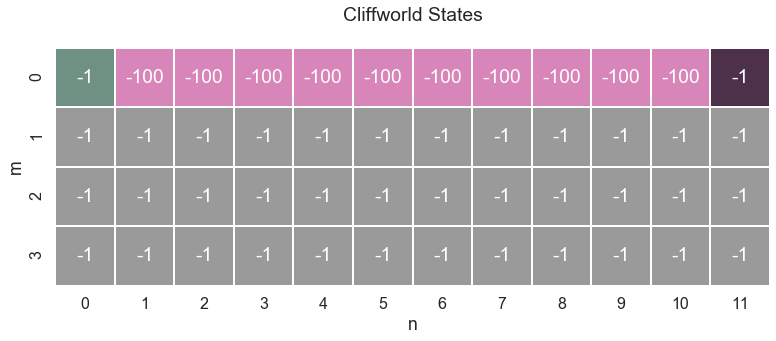

In [3]:
rewards = np.full((4,12), -1, dtype='int64')
color = np.zeros((4,12))
for x in all_states:
    if x == start_state:
        rewards[x] = -1
        color[x] = 4
    if x == goal_state:
        rewards[x] = -1
        color[x] = 2
    if x in cliff_states:
        rewards[x] = -100
        color[x] = 1

ax = sns.heatmap(color, cmap=states_colors, annot=rewards, cbar=False, square=True, linewidths=1, fmt='' )
ax.set_title('Cliffworld States\n')
ax.set(ylabel='m', xlabel='n')
sns.plt.show()

In [4]:
class CliffWorld:
    """Cliffworld para RL.

    Um domínio simples com 4 x 12 = 48 estados discretos possíveis.
    Originalmente de Sutton e Barto:
    http://webdocs.cs.ualberta.ca/~sutton/book/ebook/node65.html

    Args:
    
    Especificados no dicionário acima pois a classe não será utilizada
    fora deste notebook.


    """

    def __init__(self, *initial_data, **kwargs):
        for dictionary in initial_data:
            for key in dictionary:
                setattr(self, key, dictionary[key])
        for key in kwargs:
            setattr(self, key, kwargs[key])
        self.record_list = []
        self.position = [self.start_state]
        self.log_dict = {}
        self.reward_sum = 0

    def newstate(self, state, action):
        """Computa o novo estado.
        
        Recebe um estado e uma ação do agente e computa sua próxima posição.

        Args:
            state: uma tupla (m, n) representando as coordenadas do estado atual
            action: índice de uma ação

        Retorno:
            newstate: uma tupla (m, n) representando as coordenadas da nova posição

        """
        move = moves[action]
        newstate = State(state.m + move.m, state.n + move.n)
        self.position.append(newstate)
        return newstate

    def reward(self, state):
        """Computa o sinal de recompensa para um determinado estado.

        Recebe um estado e checa se é um abismo ou apenas um estado normal.

        Args:
            state: uma tupla (m, n)  representando as coordenadas do estado atual.

        Returns:
            reward: Um valor escalar. -100 para um abismo, -1 em caso contrário.

        """
        if state in self.cliff_states:
            reward = self.cliff_reward
        else:
            reward = self.dflt_reward
        self.reward_sum += reward
        return reward

    def is_terminal(self, state):
        """Checa se um estado é um estado final.

        Se o agente alcançou seu objetivo ou caiu em um abismo, o episódio termina.
        Caso contrário, continua a caminhar.

        Args:
            state: uma tupla (m, n)  representando as coordenadas do estado atual.

        Returns:
            True se estado é final, False em caso contrário.

        """
        if state in self.terminal:
            self.log_stuff(state)
            return True
        else:
            return False

    def log_stuff(self, state):
        """Log para análise.

        """
        self.position.append(state)
        self.log_dict['visited_states'] = self.position[:]
        self.log_dict['reward'] = self.reward_sum
        self.record_list.append(self.log_dict)
        self.log_dict = {}
        self.position = [self.start_state]
        self.log_dict = {}
        self.reward_sum = 0
        pass

    def valid_actions(self, state):
        """Computa ações válidas para um determinado estado.

        Args: 
            states: uma tupla (m, n) representando as coordenadas do estado atual.
        
        Retorno:
            valid_actions: lista contendo todas as ações válidas para o agente em seu estado atual.

        """

        valid_actions = []
        if (state.m + moves['>'].m, state.n + moves['>'].n) in self.all_states:
            valid_actions.append('>')
        if (state.m + moves['v'].m, state.n + moves['v'].n) in self.all_states:
            valid_actions.append('v')
        if (state.m + moves['<'].m, state.n + moves['<'].n) in self.all_states:
            valid_actions.append('<')
        if (state.m + moves['^'].m, state.n + moves['^'].n) in self.all_states:
            valid_actions.append('^')
        return valid_actions

Agora, implementaremos um agente Q-learning que utiliza uma política e-greedy para o problema Cliffworld:

In [5]:
class QAgent:
    """Agente Q-Learning.

    Um agente RL baseador em valores com política e-greedy.
    Usa defaultdict para retornar 0 para pares estado/ação desconhecidos.
    Propósito disso é inicializar todos os estados desconhecidos como zero.


    Args:
        epsilon: Parametro para a seleção de ação e-greedy.
        epsilon_modifier: valor escalar entre 0 e 1, fator de decrescimo de epsilon.
        alpha: Taxa de aprendizado. Usually <<1
        gamma: Desconto de recompensas futuras <=1

    Atribs:
        Q: Python defaultdict com defaultvalue 0 contendo
        os Q-valores para pares estados/ação.
        As chaves são uma tupla aninhada de estados e ações.
        Exemplo:
        {
            (State(m=0, n=0), '>'): -99.94360791266038,
            (State(m=0, n=0), 'v'): -1.1111111111107184,
            (State(m=1, n=0), '>'): -1.111111111107987,
            (State(m=1, n=0), 'v'): -1.1111111111079839,
            (State(m=1, n=0), '^'): -1.111111111108079
        }
        A: Defaultdict com estados como chave, valores são chaves
        de ações executadas. Usada para determinar se uma ação ocorreu em algum
        momento anterior naquele estado.
        Se não houver memória, len(A[state]) == 0


    """

    def __init__(self, alpha, epsilon, gamma):
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.Q = defaultdict(int)
        self.A = defaultdict(set)
        self.td_list = []

    def act(self, state, valid_actions):
        """Escolhe uma ação.

        Recebe uma tupla de estado e ações válidas e escolhe uma ação.
        A ação pode tanto ser aleatória quanto gulosa para garantir exploração.
        A probabilidade de selecionar ações aleatórias depende de epsilon.
        Menor epsilon significa menor aleatoriedade.

        Args:
            state: tupla de estado (n,m) descrevendo a posição atual.
            valid_actions: lista de índices de ações válidas para um estado.

        Retorno:
            action: Índice da ação selecionada.
            Pode ser escolhida aleatoriamente ou de forma gulosa.

        """
        if random.random() > self.epsilon:
            action = self.act_greedy(state, valid_actions)
        else:
            action = self.act_random(valid_actions)
        return action

    def learn(self, state, action, newstate, reward):
        """Computa atualização da função Q.

        Atualiza Q-valores quando alcança um estado novo e recebe recompensa.
        Novo valor equivale ao antigo valor + erro td computado multiplcado por alpha.
        Também adiciona a ação executada a A, para guardar todos os pares de estado e ação.

        Args:
            state: tupla (m, n) do estado no último instante de tempo.
            action: índice da ação executada no último instante de tempo.
            newstate: estado atual alcançado após execução de uma ação.
            reward: valor escalar recebido por alcançar o novo estado.

        Retorno:
            pass

        """
        self.Q[state, action] = (self.Q[state, action] + self.alpha *
                                 (self.td(state, action, newstate, reward)))
        self.A[state].add(action)
        pass

    def act_random(self, valid_actions):
        """Escolhe o índice de uma ação da lista de ações válidas aleatoriamente.

        Chamado se a política e-greedy retorna aleatório ou se não existe
        conhecimento prévio de valores de ação para um estado.

        Args:
            valid_actions: Lista de índices da ações válidas para um estado.

        Retorno:
            action: Índice da ação selecionada.
                Pode ser escolhida aleatoriamente ou de forma gulosa.

        """
        random_action = random.choice(valid_actions)
        return random_action

    def act_greedy(self, state, valid_actions):
        """Escolhe ação com maior Q-valor.

        Primeiro checa se o agente já executou alguma ação no estado atual.
        Se não, chama o método act_random.
        
        Args:
            valid_actions: Lista de índices da ações válidas para um estado.
            state: tupla de estado (n, m),
                representando coordenadas do estado atual.

        Retorno:
            chosen_action: Índice da ação selecionada.
                Pode ser escolhida aleatoriamente ou de forma gulosa.

        """
        if len(self.A[state]) == 0:
            chosen_action = self.act_random(valid_actions)
        else:
            q_s = {actions: self.Q[state, actions]
                   for actions in self.A[state]}
            chosen_action = max(q_s, key=q_s.get)
        return chosen_action

    def td(self, state, action, newstate, reward):
        """Computa erro td para atualizar o dicionário de valores
        
        Primeiro checa se o agente já executou alguma ação no estado atual.
        Se não, o Q-valor máximo para esse estado é definido como 0. 
        O método busca Q-valores para todas as ações previamente executadas em um newstate 
        presente em A. Em seguida, computa a chave do maior Q-value e obtem o maior Q-value.
        Finalmente, computa o erro td para a atualização da aprendizagem.

        Args:
            state: estado no último intervalo de tempo.
            action: índice da ação selecionada no último intervalo de tempo.
            newstate: estado no qual o agente chegou.
            reward: valor escalar.

        Returns:
            td: erro td
            
        """
        if len(self.A[newstate]) == 0:
            max_qval = 0
        else:
            q_vals = {actions: self.Q[newstate, actions]
                      for actions in self.A[newstate]}
            max_qval_key = max(q_vals, key=q_vals.get)
            max_qval = q_vals[max_qval_key]
        td = reward + self.gamma * max_qval - self.Q[state, action]
        self.td_list.append(td)
        return td

A única coisa que falta é testar o Q-Agent. Para tal, implementa-se uma função para conduzir múltiplos episódios.
Ao longo do progresso do agente, a quantidade de exploração através das ações aleatórias é gradualmente reduzida pela modificação de epsilon por seu parâmetro de decréscimo. Para fins de avaliação, o agente usufrui a função de valores aprendidos sem qualquer exploração no último episódio.

In [6]:
def run_episode(domain, agent):
    state = domain.start_state
    while not domain.is_terminal(state):
        valid_actions = domain.valid_actions(state) #: Recebe uma lista de movimentos possíveis para o estado atual.
        action = agent.act(state, valid_actions)    #: Computa uma ação a partir do estado atual.
        newstate = domain.newstate(state, action)   #: Realiza a ação e computa o novo estado.
        reward = domain.reward(newstate)            #: Computa recompensa.
        agent.learn(state, action, newstate, reward)#: Aprende
        state = newstate                            #: Novo estado se torna estado atual.
    pass

def run_experiment(domain, agent, epsilon_decay, n_episodes):
    for i in range(n_episodes):
        agent.epsilon *= epsilon_decay
        run_episode(domain, agent)
    print('Determinando  parâmetro epsilon para 0',
          'para evitar ações aleatórias e avaliar a política aprendida.\n')
    agent.epsilon = 0
    run_episode(domain, agent)
    last_reward = domain.record_list[-1]['reward']
    print('Treinado por {0} episódios.\n' 
          '\nObteve recompensa de {1} pontos no último episódio.'.format(n_episodes, last_reward))                       
    pass


In [7]:
epsilon = 0.9
epsilon_decay = 0.99
gamma = 0.9
alpha = 0.25
n_episodes = 500

In [8]:
q_agent = QAgent(alpha, epsilon, gamma)
domain = CliffWorld(parameters)

In [9]:
run_experiment(domain, q_agent, epsilon_decay, n_episodes)

logged_data = domain.record_list
Q_table = q_agent.Q
A_table = q_agent.A
td = q_agent.td_list

Determinando  parâmetro epsilon para 0 para evitar ações aleatórias e avaliar a política aprendida.

Treinado por 500 episódios.

Obteve recompensa de -13 pontos no último episódio.


In [10]:
action_array = np.empty((4,12), dtype=str)
value_array = np.empty((4,12), dtype=float)
for state in domain.all_states:
    if len(A_table[state])==0:
        chosen_action = 'c'
    else:
        q_s = {actions: Q_table[state, actions] 
               for actions in A_table[state]}
        chosen_action = max(q_s, key=q_s.get)
        max_qval = q_s[chosen_action]
    action_array[state] = chosen_action
    value_array[state] = max_qval
    action_array[(0,11)] = 'g'
    


O código abaixo visualiza o que o agente aprendeu:

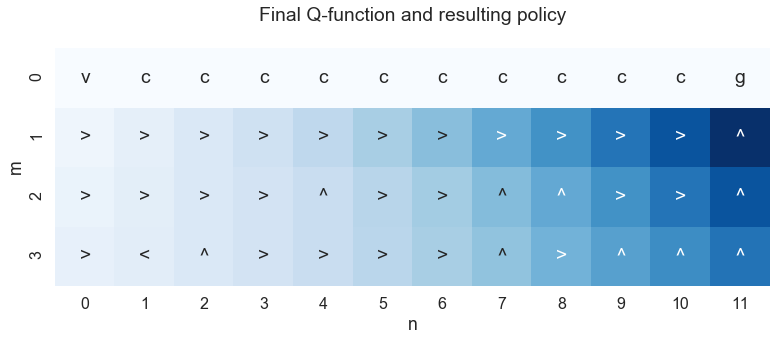

In [11]:
figure = sns.heatmap(value_array, annot = action_array,  fmt= '', square=True, cbar=False, cmap= cmap_default)
ax = plt.axes()
ax.set_title('Final Q-function and resulting policy\n')
figure.set(xlabel='n', ylabel='m')
sns.plt.show()

Aqui está o caminho final do agente. Alterando os parâmetros é fácil encontrar uma combinação que converge para o menor caminho.

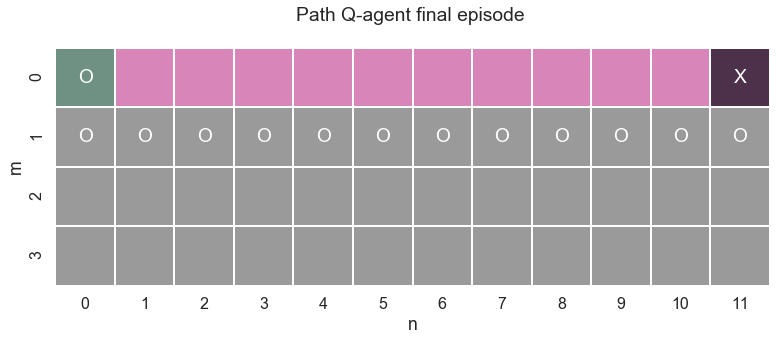

In [12]:
agent_position_log = domain.record_list[-1]['visited_states']

agent_path = np.empty((4, 12), dtype=str)

for state_visited in agent_position_log:
    if state_visited in terminal:
        agent_path[state_visited] = 'X'
    else:
        agent_path[state_visited] = 'O'

ax = plt.axes()
ax.set_title('Path Q-agent final episode \n')
figure = sns.heatmap(color,
                     annot=agent_path,
                     fmt='',
                     ax=ax,
                     cbar=False,
                     linewidth=1,
                     cmap=states_colors,
                     square=True)
figure.set(xlabel='n', ylabel='m')
sns.plt.show()

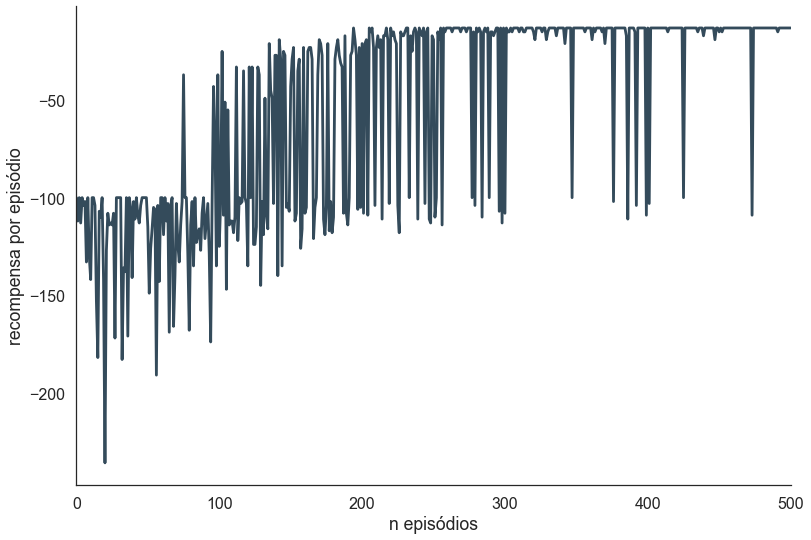

In [13]:
points = [i['reward'] for i in logged_data]
figure = sns.tsplot(points, color= cpal_default)
figure.set(xlabel='n episódios', ylabel='recompensa por episódio')
sns.despine()

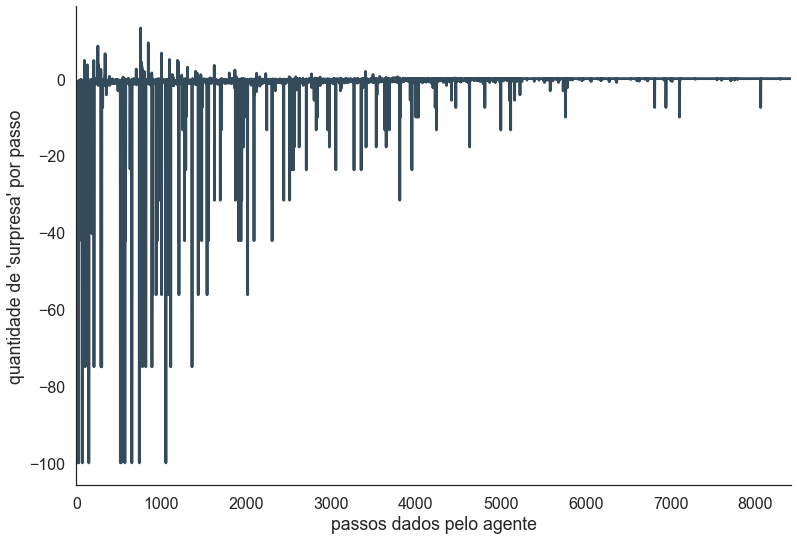

In [14]:
figure = sns.tsplot(td, color= cpal_default)
figure.set(xlabel='passos dados pelo agente', ylabel="quantidade de 'surpresa' por passo")
sns.despine()

## Deep Reinforcement Learning

Nos últimos anos, pesquisadores da área de aprendizado de máquina tem buscado estratégias para combinar o paradigma de aprendizado por tentativa-e-erro para obtenção de recompensas à longo prazo do Reinforcement Learning(RL), e a habilidade de obter conhecimento diretamente de *raw inputs*, tais como visão, sem qualquer heurística ou engenharia de característica; propriedade alcançada através do aprendizado profundo das redes neurais. A combinação dessas técnicas é chamada Deep Reinforcement Learning (DRL) e representa fortemente o estado da arte do RL.

Mnih et al (2013), no trabalho *Playing Atari with Deep Reinforcement Learning*, apresenta a primeira tentativa bem sucedida de algoritmo de DRL. Partindo da premissa de que agentes devem continuamente realizar juízo de valores para selecionar ações boas de ruins, implementa-se uma Q-network que estima o total de recompensa que um agente pode esperar receber após tomar uma determinada ação. A ideia central é usar uma rede neural profunda para representar essa Q-network e treina-la para prever a recompensa total. Adicionalmente, a Deep Q-Network (DQN) armazena todas as experiências do agente em uma memória de replay, toma amostras aleatórias e revisita essas experiências para prover dados de treinamento diversos e descorrelacionados.

O algoritmo de DRL utiliza uma técnica chamada *experience replay* onde são guardadas as experiências do agente a cada instante de tempo, $e_t = (s_t,a_t,r_t,s_{t+1})$ em um data-set $D = e_1,...,e_N$, obtidos ao longo de muitos episódios em um *memory replay*. Durante o ciclo interno do algoritmo, são aplicadas atualizações do Q-Learning aos samples de experiência, escolhidos aleatoriamente do conjunto de amostras guardadas. Após realizar o replay de experiência, o agente seleciona e executa uma ação de acordo com uma política $\epsilon$-greedy. Uma vez que usar histórias de tamanhos arbitrários como entrada para uma rede neural pode ser difícil, o algoritmo usa uma representação de tamanho fixo produzido por uma função $\phi$. O algoritmo completo pode ser observado na figura abaixo.

<img align="center" style='display: block;padding: 20px' src="imgs\algoritmodql.png">

**As vantagens desse método são**:
* Cada passo de uma experiência é potencialmente usada em muitas atualizações de peso.
* Aprender diretamente de amostras consecutivas é ineficiente em virtude da forte correlação, logo o emprego de amostras aleatórias quebra essas correlações e reduz a variância das atualizações.
* Usando replay de experiência, a distribuição de comportamento é mediada sobre seus muitos estados anteriores, tornando o aprendizado mais suave e evitando oscilações e divergência em parâmetros.

O algoritmo apresentado foi utilizado para treinar um agente em 7 jogos de atari, tendo como resultado uma performance superior a abordagens anteriores, em 6 jogos destes, e superando um expert humano em 3 deles.

## Referências Bibliográficas
* <a href="https://www.maxwell.vrac.puc-rio.br/19637/19637_4.PDF">Aprendizado por Reforço</a>. PUC-RIO.
* <a href="http://www.bitabit.eng.br/wp-content/uploads/2010/11/MobotLearn.pdf">Mobot-Learn: Aprendizado por Reforço utilizando políticas parciais e macroestados na navegação de robôs móveis</a>. TREVELIM, B.T.M.
* <a href="http://professor.ufabc.edu.br/~ronaldo.prati/InteligenciaArtificial/reinforcement-learning.pdf">Aprendizagem por Reforço</a>. PRATI, R. UFABC.
* <a href="http://www.seer.ufrgs.br/rita/article/viewFile/rita_v14_n2_p133-179/3544">Processos de Decisão de Markov: um tutorial</a>. PELLEGRINI J. e
WAINER J.
* Slides de aula da disciplina de Inteligência Artificial do programa de Mestrado da Universidade Federal de Minas Gerais, ministradas pelo professor Luiz Chaimowicz. (material não disponível online).
* <a href="http://nbviewer.jupyter.org/github/DavidSanwald/ai-notebook/blob/master/index.ipynb">Ai-Notebook Cliffworld States</a>. SANWALD, D. TU Berlim. (Alternativo: <a href="http://mybinder.org/repo/davidsanwald/ai-notebook">versão interativa</a>)
* <a href="http://people.inf.elte.hu/lorincz/Files/RL_2006/SuttonBook.pdf">Reinforcement Learning: An Introduction</a>. SUTTON, R.S. e BARTO, A.G. MIT Press.
* <a href="https://deepmind.com/blog/deep-reinforcement-learning/">Deep Reinforcement Learning | Deep Mind</a>. SILVER, D. DeepMind.
* <a href="https://arxiv.org/abs/1312.5602">Playing Atari with Deep Reinforcement Learning</a>. MNIH. V. et al.
